In [1]:
using OrdinaryDiffEq, LinearAlgebra, ForwardDiff, PyPlot

In [2]:
grid_length=1000
X1 = range(-30,stop=30,length=grid_length)
P1=range(-2,stop=2,length=grid_length)
grid=Iterators.product(X1,P1)
grid=collect.(grid)
println(length(grid))

println(grid[1][1])

1000000
-30.0


In [3]:
function energia_poinc(x0, p0, m0, M0, a0, b0, H0)
    return (2. *M0*(H0-p0*p0/(2. *m0)+a*x0*x0/2. -b*x0*x0*x0*x0/4. ))^(1. /2. )
end

energia_poinc (generic function with 1 method)

In [4]:
m=[1.,0.1]
w=[0.,0.7071]
g=[0.,0.01]
a=0.25
b=0.01
time=1.
dts=0.01*2. *pi/w[2]
tspan = (0,time)
initial_position = [0., 0.]
#initial_velocity = [-4./m[1], (-1. )^1. *energia_poinc(0.,-3.4957/m[1],m[1],m[2],a,b,Hinicial)/m[2]]
initial_momentum=[0. ,0.]
colors=zeros(length(grid))
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+ p[2]^2. /(2. *m[2]) +0.5*m[2]*w[2]^2. *q[2]^2.  
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)
k=0.


for I in range(1,stop=length(grid),length=length(grid))
    #println(I)
    #Hinicial=20.0
    initial_position[2]=grid[Int(I)][1]
    initial_momentum[2]=grid[Int(I)][2]
            
    
    prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
    @time sol3 = solve(prob, CalvoSanz4(), dt=dts);
    if sol3[3,2] > 0.
        colors[Int(I)]=1.
    else
        colors[Int(I)]=0.
    end
end

  6.248492 seconds (14.30 M allocations: 675.465 MiB, 5.16% gc time)
  0.000210 seconds (3.74 k allocations: 104.156 KiB)
  0.000483 seconds (3.74 k allocations: 104.156 KiB)
  0.000179 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000133 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000134 seconds (3.74 k allocations: 104.156 KiB)
  0.000132 seconds (3.74 k all

  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000169 seconds (3.74 k allocations: 104.156 KiB)
  0.000154 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000250 seconds (3.74 k allocations: 104.156 KiB)
  0.000167 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000153 seconds (3.74 k allocations: 104.156 KiB)
  0.000158 seconds (3.74 k allocations: 104.156 KiB)
  0.000159 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.15

  0.000168 seconds (3.74 k allocations: 104.156 KiB)
  0.000187 seconds (3.74 k allocations: 104.156 KiB)
  0.000183 seconds (3.74 k allocations: 104.156 KiB)
  0.000177 seconds (3.74 k allocations: 104.156 KiB)
  0.000176 seconds (3.74 k allocations: 104.156 KiB)
  0.000178 seconds (3.74 k allocations: 104.156 KiB)
  0.000390 seconds (3.74 k allocations: 104.156 KiB)
  0.000418 seconds (3.74 k allocations: 104.156 KiB)
  0.000412 seconds (3.74 k allocations: 104.156 KiB)
  0.000222 seconds (3.74 k allocations: 104.156 KiB)
  0.000166 seconds (3.74 k allocations: 104.156 KiB)
  0.000309 seconds (3.74 k allocations: 104.156 KiB)
  0.000170 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000162 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000164 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.15

  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000315 seconds (3.74 k allocations: 104.156 KiB)
  0.000315 seconds (3.74 k allocations: 104.156 KiB)
  0.000300 seconds (3.74 k allocations: 104.156 KiB)
  0.000363 seconds (3.74 k allocations: 104.156 KiB)
  0.000380 seconds (3.74 k allocations: 104.156 KiB)
  0.000220 seconds (3.74 k allocations: 104.156 KiB)
  0.000178 seconds (3.74 k allocations: 104.156 KiB)
  0.000167 seconds (3.74 k allocations: 104.156 KiB)
  0.000188 seconds (3.74 k allocations: 104.156 KiB)
  0.000167 seconds (3.74 k allocations: 104.156 KiB)
  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000162 seconds (3.74 k allocations: 104.156 KiB)
  0.000174 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000167 seconds (3.74 k allocations: 104.15

  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000232 seconds (3.74 k allocations: 104.156 KiB)
  0.000275 seconds (3.74 k allocations: 104.156 KiB)
  0.000276 seconds (3.74 k allocations: 104.156 KiB)
  0.000302 seconds (3.74 k allocations: 104.156 KiB)
  0.000344 seconds (3.74 k allocations: 104.156 KiB)
  0.000254 seconds (3.74 k allocations: 104.156 KiB)
  0.000174 seconds (3.74 k allocations: 104.156 KiB)
  0.000217 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000211 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.15

  0.000133 seconds (3.74 k allocations: 104.156 KiB)
  0.000228 seconds (3.74 k allocations: 104.156 KiB)
  0.000281 seconds (3.74 k allocations: 104.156 KiB)
  0.000266 seconds (3.74 k allocations: 104.156 KiB)
  0.000309 seconds (3.74 k allocations: 104.156 KiB)
  0.000318 seconds (3.74 k allocations: 104.156 KiB)
  0.000250 seconds (3.74 k allocations: 104.156 KiB)
  0.000220 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000178 seconds (3.74 k allocations: 104.156 KiB)
  0.000159 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000134 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.15

  0.000158 seconds (3.74 k allocations: 104.156 KiB)
  0.000310 seconds (3.74 k allocations: 104.156 KiB)
  0.000322 seconds (3.74 k allocations: 104.156 KiB)
  0.000321 seconds (3.74 k allocations: 104.156 KiB)
  0.000366 seconds (3.74 k allocations: 104.156 KiB)
  0.000361 seconds (3.74 k allocations: 104.156 KiB)
  0.000224 seconds (3.74 k allocations: 104.156 KiB)
  0.000191 seconds (3.74 k allocations: 104.156 KiB)
  0.000165 seconds (3.74 k allocations: 104.156 KiB)
  0.000208 seconds (3.74 k allocations: 104.156 KiB)
  0.000166 seconds (3.74 k allocations: 104.156 KiB)
  0.000164 seconds (3.74 k allocations: 104.156 KiB)
  0.000162 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000164 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000189 seconds (3.74 k allocations: 104.156 KiB)
  0.000191 seconds (3.74 k allocations: 104.15

  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000359 seconds (3.74 k allocations: 104.156 KiB)
  0.000344 seconds (3.74 k allocations: 104.156 KiB)
  0.000295 seconds (3.74 k allocations: 104.156 KiB)
  0.000318 seconds (3.74 k allocations: 104.156 KiB)
  0.000328 seconds (3.74 k allocations: 104.156 KiB)
  0.000320 seconds (3.74 k allocations: 104.156 KiB)
  0.000305 seconds (3.74 k allocations: 104.156 KiB)
  0.000389 seconds (3.74 k allocations: 104.156 KiB)
  0.000158 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000188 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000142 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.15

  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000156 seconds (3.74 k allocations: 104.156 KiB)
  0.000153 seconds (3.74 k allocations: 104.156 KiB)
  0.000150 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000388 seconds (3.74 k allocations: 104.156 KiB)
  0.000425 seconds (3.74 k allocations: 104.156 KiB)
  0.000379 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000274 seconds (3.74 k allocations: 104.156 KiB)
  0.000143 seconds (3.74 k allocations: 104.156 KiB)
  0.000174 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000284 seconds (3.74 k allocations: 104.15

  0.000143 seconds (3.74 k allocations: 104.156 KiB)
  0.000259 seconds (3.74 k allocations: 104.156 KiB)
  0.000274 seconds (3.74 k allocations: 104.156 KiB)
  0.000280 seconds (3.74 k allocations: 104.156 KiB)
  0.000298 seconds (3.74 k allocations: 104.156 KiB)
  0.000330 seconds (3.74 k allocations: 104.156 KiB)
  0.000242 seconds (3.74 k allocations: 104.156 KiB)
  0.000182 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000183 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000191 seconds (3.74 k allocations: 104.156 KiB)
  0.000175 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.15

  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000267 seconds (3.74 k allocations: 104.156 KiB)
  0.000318 seconds (3.74 k allocations: 104.156 KiB)
  0.000346 seconds (3.74 k allocations: 104.156 KiB)
  0.000325 seconds (3.74 k allocations: 104.156 KiB)
  0.000353 seconds (3.74 k allocations: 104.156 KiB)
  0.000215 seconds (3.74 k allocations: 104.156 KiB)
  0.000189 seconds (3.74 k allocations: 104.156 KiB)
  0.000304 seconds (3.74 k allocations: 104.156 KiB)
  0.000186 seconds (3.74 k allocations: 104.156 KiB)
  0.000213 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000175 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000142 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.15

  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000306 seconds (3.74 k allocations: 104.156 KiB)
  0.000282 seconds (3.74 k allocations: 104.156 KiB)
  0.000272 seconds (3.74 k allocations: 104.156 KiB)
  0.000314 seconds (3.74 k allocations: 104.156 KiB)
  0.000361 seconds (3.74 k allocations: 104.156 KiB)
  0.000198 seconds (3.74 k allocations: 104.156 KiB)
  0.000371 seconds (3.74 k allocations: 104.156 KiB)
  0.000327 seconds (3.74 k allocations: 104.156 KiB)
  0.000321 seconds (3.74 k allocations: 104.156 KiB)
  0.000262 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.15

  0.000266 seconds (3.74 k allocations: 104.156 KiB)
  0.000298 seconds (3.74 k allocations: 104.156 KiB)
  0.000479 seconds (3.74 k allocations: 104.156 KiB)
  0.000277 seconds (3.74 k allocations: 104.156 KiB)
  0.000304 seconds (3.74 k allocations: 104.156 KiB)
  0.000324 seconds (3.74 k allocations: 104.156 KiB)
  0.000198 seconds (3.74 k allocations: 104.156 KiB)
  0.000197 seconds (3.74 k allocations: 104.156 KiB)
  0.000154 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000150 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.15

  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000282 seconds (3.74 k allocations: 104.156 KiB)
  0.000272 seconds (3.74 k allocations: 104.156 KiB)
  0.000260 seconds (3.74 k allocations: 104.156 KiB)
  0.000298 seconds (3.74 k allocations: 104.156 KiB)
  0.000339 seconds (3.74 k allocations: 104.156 KiB)
  0.000217 seconds (3.74 k allocations: 104.156 KiB)
  0.000225 seconds (3.74 k allocations: 104.156 KiB)
  0.000143 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000190 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000195 seconds (3.74 k allocations: 104.156 KiB)
  0.000394 seconds (3.74 k allocations: 104.156 KiB)
  0.000695 seconds (3.74 k allocations: 104.156 KiB)
  0.000335 seconds (3.74 k allocations: 104.15

  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000249 seconds (3.74 k allocations: 104.156 KiB)
  0.000274 seconds (3.74 k allocations: 104.156 KiB)
  0.000268 seconds (3.74 k allocations: 104.156 KiB)
  0.000303 seconds (3.74 k allocations: 104.156 KiB)
  0.000340 seconds (3.74 k allocations: 104.156 KiB)
  0.000368 seconds (3.74 k allocations: 104.156 KiB)
  0.000178 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000232 seconds (3.74 k allocations: 104.156 KiB)
  0.000305 seconds (3.74 k allocations: 104.156 KiB)
  0.000255 seconds (3.74 k allocations: 104.156 KiB)
  0.000158 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000293 seconds (3.74 k allocations: 104.156 KiB)
  0.000318 seconds (3.74 k allocations: 104.15

  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000289 seconds (3.74 k allocations: 104.156 KiB)
  0.000340 seconds (3.74 k allocations: 104.156 KiB)
  0.000289 seconds (3.74 k allocations: 104.156 KiB)
  0.000316 seconds (3.74 k allocations: 104.156 KiB)
  0.000342 seconds (3.74 k allocations: 104.156 KiB)
  0.000216 seconds (3.74 k allocations: 104.156 KiB)
  0.000199 seconds (3.74 k allocations: 104.156 KiB)
  0.000292 seconds (3.74 k allocations: 104.156 KiB)
  0.000214 seconds (3.74 k allocations: 104.156 KiB)
  0.000159 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000150 seconds (3.74 k allocations: 104.156 KiB)
  0.000158 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000294 seconds (3.74 k allocations: 104.156 KiB)
  0.000300 seconds (3.74 k allocations: 104.15

  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000277 seconds (3.74 k allocations: 104.156 KiB)
  0.000296 seconds (3.74 k allocations: 104.156 KiB)
  0.000261 seconds (3.74 k allocations: 104.156 KiB)
  0.000310 seconds (3.74 k allocations: 104.156 KiB)
  0.000340 seconds (3.74 k allocations: 104.156 KiB)
  0.000189 seconds (3.74 k allocations: 104.156 KiB)
  0.000212 seconds (3.74 k allocations: 104.156 KiB)
  0.000143 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000169 seconds (3.74 k allocations: 104.156 KiB)
  0.000142 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000134 seconds (3.74 k allocations: 104.156 KiB)
  0.000134 seconds (3.74 k allocations: 104.156 KiB)
  0.000134 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.15

  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000159 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000158 seconds (3.74 k allocations: 104.156 KiB)
  0.000153 seconds (3.74 k allocations: 104.156 KiB)
  0.000379 seconds (3.74 k allocations: 104.156 KiB)
  0.000355 seconds (3.74 k allocations: 104.156 KiB)
  0.000392 seconds (3.74 k allocations: 104.156 KiB)
  0.000177 seconds (3.74 k allocations: 104.156 KiB)
  0.000143 seconds (3.74 k allocations: 104.156 KiB)
  0.000313 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.15

  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000158 seconds (3.74 k allocations: 104.156 KiB)
  0.000155 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000378 seconds (3.74 k allocations: 104.156 KiB)
  0.000374 seconds (3.74 k allocations: 104.156 KiB)
  0.000374 seconds (3.74 k allocations: 104.156 KiB)
  0.000213 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.156 KiB)
  0.000271 seconds (3.74 k allocations: 104.156 KiB)
  0.000155 seconds (3.74 k allocations: 104.156 KiB)
  0.000155 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.15

  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000159 seconds (3.74 k allocations: 104.156 KiB)
  0.000154 seconds (3.74 k allocations: 104.156 KiB)
  0.000153 seconds (3.74 k allocations: 104.156 KiB)
  0.000154 seconds (3.74 k allocations: 104.156 KiB)
  0.000405 seconds (3.74 k allocations: 104.156 KiB)
  0.000368 seconds (3.74 k allocations: 104.156 KiB)
  0.000387 seconds (3.74 k allocations: 104.156 KiB)
  0.000259 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000231 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.15

  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000194 seconds (3.74 k allocations: 104.156 KiB)
  0.000157 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000251 seconds (3.74 k allocations: 104.156 KiB)
  0.000414 seconds (3.74 k allocations: 104.156 KiB)
  0.000361 seconds (3.74 k allocations: 104.156 KiB)
  0.000368 seconds (3.74 k allocations: 104.156 KiB)
  0.000228 seconds (3.74 k allocations: 104.156 KiB)
  0.000211 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.15

  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000158 seconds (3.74 k allocations: 104.156 KiB)
  0.000156 seconds (3.74 k allocations: 104.156 KiB)
  0.000150 seconds (3.74 k allocations: 104.156 KiB)
  0.000205 seconds (3.74 k allocations: 104.156 KiB)
  0.000385 seconds (3.74 k allocations: 104.156 KiB)
  0.000380 seconds (3.74 k allocations: 104.156 KiB)
  0.000373 seconds (3.74 k allocations: 104.156 KiB)
  0.000203 seconds (3.74 k allocations: 104.156 KiB)
  0.000190 seconds (3.74 k allocations: 104.156 KiB)
  0.000445 seconds (3.74 k allocations: 104.156 KiB)
  0.000382 seconds (3.74 k allocations: 104.156 KiB)
  0.000372 seconds (3.74 k allocations: 104.156 KiB)
  0.000365 seconds (3.74 k allocations: 104.156 KiB)
  0.000307 seconds (3.74 k allocations: 104.156 KiB)
  0.000199 seconds (3.74 k allocations: 104.156 KiB)
  0.000524 seconds (3.74 k allocations: 104.156 KiB)
  0.000524 seconds (3.74 k allocations: 104.156 KiB)
  0.000313 seconds (3.74 k allocations: 104.15

  0.000280 seconds (3.74 k allocations: 104.156 KiB)
  0.000223 seconds (3.74 k allocations: 104.156 KiB)
  0.000177 seconds (3.74 k allocations: 104.156 KiB)
  0.000157 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000389 seconds (3.74 k allocations: 104.156 KiB)
  0.000406 seconds (3.74 k allocations: 104.156 KiB)
  0.000441 seconds (3.74 k allocations: 104.156 KiB)
  0.000182 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000346 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000142 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.15

  0.000174 seconds (3.74 k allocations: 104.156 KiB)
  0.000188 seconds (3.74 k allocations: 104.156 KiB)
  0.000155 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000257 seconds (3.74 k allocations: 104.156 KiB)
  0.000177 seconds (3.74 k allocations: 104.156 KiB)
  0.000166 seconds (3.74 k allocations: 104.156 KiB)
  0.000185 seconds (3.74 k allocations: 104.156 KiB)
  0.000166 seconds (3.74 k allocations: 104.156 KiB)
  0.000221 seconds (3.74 k allocations: 104.156 KiB)
  0.000154 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000201 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000187 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.15

  0.000134 seconds (3.74 k allocations: 104.156 KiB)
  0.000179 seconds (3.74 k allocations: 104.156 KiB)
  0.000165 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000253 seconds (3.74 k allocations: 104.156 KiB)
  0.000167 seconds (3.74 k allocations: 104.156 KiB)
  0.000164 seconds (3.74 k allocations: 104.156 KiB)
  0.000153 seconds (3.74 k allocations: 104.156 KiB)
  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000150 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000259 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000154 seconds (3.74 k allocations: 104.156 KiB)
  0.000170 seconds (3.74 k allocations: 104.156 KiB)
  0.000210 seconds (3.74 k allocations: 104.156 KiB)
  0.000164 seconds (3.74 k allocations: 104.156 KiB)
  0.000180 seconds (3.74 k allocations: 104.15

  0.000142 seconds (3.74 k allocations: 104.156 KiB)
  0.000164 seconds (3.74 k allocations: 104.156 KiB)
  0.000242 seconds (3.74 k allocations: 104.156 KiB)
  0.000175 seconds (3.74 k allocations: 104.156 KiB)
  0.000230 seconds (3.74 k allocations: 104.156 KiB)
  0.000176 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000194 seconds (3.74 k allocations: 104.156 KiB)
  0.000166 seconds (3.74 k allocations: 104.156 KiB)
  0.000189 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000169 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000134 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000134 seconds (3.74 k allocations: 104.15

  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000153 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000221 seconds (3.74 k allocations: 104.156 KiB)
  0.000413 seconds (3.74 k allocations: 104.156 KiB)
  0.000357 seconds (3.74 k allocations: 104.156 KiB)
  0.000429 seconds (3.74 k allocations: 104.156 KiB)
  0.000364 seconds (3.74 k allocations: 104.156 KiB)
  0.000368 seconds (3.74 k allocations: 104.156 KiB)
  0.000325 seconds (3.74 k allocations: 104.156 KiB)
  0.000704 seconds (3.74 k allocations: 104.156 KiB)
  0.000324 seconds (3.74 k allocations: 104.156 KiB)
  0.000322 seconds (3.74 k allocations: 104.156 KiB)
  0.000319 seconds (3.74 k allocations: 104.156 KiB)
  0.000317 seconds (3.74 k allocations: 104.156 KiB)
  0.000361 seconds (3.74 k allocations: 104.156 KiB)
  0.000393 seconds (3.74 k allocations: 104.156 KiB)
  0.000366 seconds (3.74 k allocations: 104.15

  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000150 seconds (3.74 k allocations: 104.156 KiB)
  0.000224 seconds (3.74 k allocations: 104.156 KiB)
  0.000418 seconds (3.74 k allocations: 104.156 KiB)
  0.000369 seconds (3.74 k allocations: 104.156 KiB)
  0.000407 seconds (3.74 k allocations: 104.156 KiB)
  0.000350 seconds (3.74 k allocations: 104.156 KiB)
  0.000381 seconds (3.74 k allocations: 104.156 KiB)
  0.000326 seconds (3.74 k allocations: 104.156 KiB)
  0.000370 seconds (3.74 k allocations: 104.156 KiB)
  0.000321 seconds (3.74 k allocations: 104.156 KiB)
  0.000321 seconds (3.74 k allocations: 104.156 KiB)
  0.000318 seconds (3.74 k allocations: 104.156 KiB)
  0.000318 seconds (3.74 k allocations: 104.156 KiB)
  0.000311 seconds (3.74 k allocations: 104.156 KiB)
  0.000360 seconds (3.74 k allocations: 104.156 KiB)
  0.000402 seconds (3.74 k allocations: 104.15

  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000356 seconds (3.74 k allocations: 104.156 KiB)
  0.000156 seconds (3.74 k allocations: 104.156 KiB)
  0.000321 seconds (3.74 k allocations: 104.156 KiB)
  0.000401 seconds (3.74 k allocations: 104.156 KiB)
  0.000351 seconds (3.74 k allocations: 104.156 KiB)
  0.000350 seconds (3.74 k allocations: 104.156 KiB)
  0.000343 seconds (3.74 k allocations: 104.156 KiB)
  0.000334 seconds (3.74 k allocations: 104.156 KiB)
  0.000329 seconds (3.74 k allocations: 104.156 KiB)
  0.000342 seconds (3.74 k allocations: 104.156 KiB)
  0.000322 seconds (3.74 k allocations: 104.156 KiB)
  0.000315 seconds (3.74 k allocations: 104.156 KiB)
  0.000320 seconds (3.74 k allocations: 104.156 KiB)
  0.000313 seconds (3.74 k allocations: 104.156 KiB)
  0.000322 seconds (3.74 k allocations: 104.156 KiB)
  0.000356 seconds (3.74 k allocations: 104.156 KiB)
  0.000354 seconds (3.74 k allocations: 104.156 KiB)
  0.000356 seconds (3.74 k allocations: 104.15

  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000481 seconds (3.74 k allocations: 104.156 KiB)
  0.000698 seconds (3.74 k allocations: 104.156 KiB)
  0.000289 seconds (3.74 k allocations: 104.156 KiB)
  0.000187 seconds (3.74 k allocations: 104.156 KiB)
  0.000174 seconds (3.74 k allocations: 104.156 KiB)
  0.000172 seconds (3.74 k allocations: 104.156 KiB)
  0.000467 seconds (3.74 k allocations: 104.156 KiB)
  0.000352 seconds (3.74 k allocations: 104.156 KiB)
  0.000153 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.15

  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000285 seconds (3.74 k allocations: 104.156 KiB)
  0.000281 seconds (3.74 k allocations: 104.156 KiB)
  0.000266 seconds (3.74 k allocations: 104.156 KiB)
  0.000337 seconds (3.74 k allocations: 104.156 KiB)
  0.000334 seconds (3.74 k allocations: 104.156 KiB)
  0.000191 seconds (3.74 k allocations: 104.156 KiB)
  0.000188 seconds (3.74 k allocations: 104.156 KiB)
  0.000165 seconds (3.74 k allocations: 104.156 KiB)
  0.000142 seconds (3.74 k allocations: 104.156 KiB)
  0.000199 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000153 seconds (3.74 k allocations: 104.15

  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000237 seconds (3.74 k allocations: 104.156 KiB)
  0.000280 seconds (3.74 k allocations: 104.156 KiB)
  0.000287 seconds (3.74 k allocations: 104.156 KiB)
  0.000301 seconds (3.74 k allocations: 104.156 KiB)
  0.000331 seconds (3.74 k allocations: 104.156 KiB)
  0.000230 seconds (3.74 k allocations: 104.156 KiB)
  0.000221 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000172 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000162 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000150 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000150 seconds (3.74 k allocations: 104.15

  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000257 seconds (3.74 k allocations: 104.156 KiB)
  0.000270 seconds (3.74 k allocations: 104.156 KiB)
  0.000262 seconds (3.74 k allocations: 104.156 KiB)
  0.000299 seconds (3.74 k allocations: 104.156 KiB)
  0.000327 seconds (3.74 k allocations: 104.156 KiB)
  0.000208 seconds (3.74 k allocations: 104.156 KiB)
  0.000176 seconds (3.74 k allocations: 104.156 KiB)
  0.000161 seconds (3.74 k allocations: 104.156 KiB)
  0.000172 seconds (3.74 k allocations: 104.156 KiB)
  0.000159 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.156 KiB)
  0.000155 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.15

  0.000134 seconds (3.74 k allocations: 104.156 KiB)
  0.000239 seconds (3.74 k allocations: 104.156 KiB)
  0.000275 seconds (3.74 k allocations: 104.156 KiB)
  0.000272 seconds (3.74 k allocations: 104.156 KiB)
  0.000293 seconds (3.74 k allocations: 104.156 KiB)
  0.000326 seconds (3.74 k allocations: 104.156 KiB)
  0.000231 seconds (3.74 k allocations: 104.156 KiB)
  0.000168 seconds (3.74 k allocations: 104.156 KiB)
  0.000172 seconds (3.74 k allocations: 104.156 KiB)
  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000151 seconds (3.74 k allocations: 104.156 KiB)
  0.000172 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000148 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000155 seconds (3.74 k allocations: 104.15

  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000283 seconds (3.74 k allocations: 104.156 KiB)
  0.000279 seconds (3.74 k allocations: 104.156 KiB)
  0.000269 seconds (3.74 k allocations: 104.156 KiB)
  0.000313 seconds (3.74 k allocations: 104.156 KiB)
  0.000338 seconds (3.74 k allocations: 104.156 KiB)
  0.000204 seconds (3.74 k allocations: 104.156 KiB)
  0.000169 seconds (3.74 k allocations: 104.156 KiB)
  0.000142 seconds (3.74 k allocations: 104.156 KiB)
  0.000163 seconds (3.74 k allocations: 104.156 KiB)
  0.000157 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000139 seconds (3.74 k allocations: 104.156 KiB)
  0.000165 seconds (3.74 k allocations: 104.156 KiB)
  0.000155 seconds (3.74 k allocations: 104.156 KiB)
  0.000172 seconds (3.74 k allocations: 104.156 KiB)
  0.000152 seconds (3.74 k allocations: 104.156 KiB)
  0.000150 seconds (3.74 k allocations: 104.15

  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000278 seconds (3.74 k allocations: 104.156 KiB)
  0.000309 seconds (3.74 k allocations: 104.156 KiB)
  0.000263 seconds (3.74 k allocations: 104.156 KiB)
  0.000301 seconds (3.74 k allocations: 104.156 KiB)
  0.000326 seconds (3.74 k allocations: 104.156 KiB)
  0.000229 seconds (3.74 k allocations: 104.156 KiB)
  0.000227 seconds (3.74 k allocations: 104.156 KiB)
  0.000143 seconds (3.74 k allocations: 104.156 KiB)
  0.000138 seconds (3.74 k allocations: 104.156 KiB)
  0.000200 seconds (3.74 k allocations: 104.156 KiB)
  0.000142 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000137 seconds (3.74 k allocations: 104.156 KiB)
  0.000136 seconds (3.74 k allocations: 104.156 KiB)
  0.000143 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000134 seconds (3.74 k allocations: 104.156 KiB)
  0.000135 seconds (3.74 k allocations: 104.15

  0.000135 seconds (3.74 k allocations: 104.156 KiB)
  0.000273 seconds (3.74 k allocations: 104.156 KiB)
  0.000270 seconds (3.74 k allocations: 104.156 KiB)
  0.000299 seconds (3.74 k allocations: 104.156 KiB)
  0.000297 seconds (3.74 k allocations: 104.156 KiB)
  0.000322 seconds (3.74 k allocations: 104.156 KiB)
  0.000196 seconds (3.74 k allocations: 104.156 KiB)
  0.000167 seconds (3.74 k allocations: 104.156 KiB)
  0.000155 seconds (3.74 k allocations: 104.156 KiB)
  0.000149 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000172 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.156 KiB)
  0.000145 seconds (3.74 k allocations: 104.156 KiB)
  0.000167 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000146 seconds (3.74 k allocations: 104.15

  0.000147 seconds (3.74 k allocations: 104.156 KiB)
  0.000288 seconds (3.74 k allocations: 104.156 KiB)
  0.000371 seconds (3.74 k allocations: 104.156 KiB)
  0.000283 seconds (3.74 k allocations: 104.156 KiB)
  0.000310 seconds (3.74 k allocations: 104.156 KiB)
  0.000323 seconds (3.74 k allocations: 104.156 KiB)
  0.000182 seconds (3.74 k allocations: 104.156 KiB)
  0.000181 seconds (3.74 k allocations: 104.156 KiB)
  0.000235 seconds (3.74 k allocations: 104.156 KiB)
  0.000160 seconds (3.74 k allocations: 104.156 KiB)
  0.000182 seconds (3.74 k allocations: 104.156 KiB)
  0.000153 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000193 seconds (3.74 k allocations: 104.156 KiB)
  0.000172 seconds (3.74 k allocations: 104.156 KiB)
  0.014335 seconds (3.74 k allocations: 104.156 KiB, 98.57% gc time)
  0.000350 seconds (3.74 k allocations: 104.156 KiB)
  0.000324 seconds (3.74 k all

Excessive output truncated after 524291 bytes.

  0.000170 seconds (3.74 k allocations: 104.156 KiB)
  0.000289 seconds (3.74 k allocations: 104.156 KiB)
  0.000303 seconds (3.74 k allocations: 104.156 KiB)
  0.000353 seconds (3.74 k allocations: 104.156 KiB)
  0.000348 seconds (3.74 k allocations: 104.156 KiB)
  0.000204 seconds (3.74 k allocations: 104.156 KiB)
  0.000168 seconds (3.74 k allocations: 104.156 KiB)
  0.000165 seconds (3.74 k allocations: 104.156 KiB)
  0.000155 seconds (3.74 k allocations: 104.156 KiB)
  0.000409 seconds (3.74 k allocations: 104.156 KiB)
  0.000374 seconds (3.74 k allocations: 104.156 KiB)
  0.000374 seconds (3.74 k allocations: 104.156 KiB)
  0.000157 seconds (3.74 k allocations: 104.156 KiB)
  0.000144 seconds (3.74 k allocations: 104.156 KiB)
  0.000143 seconds (3.74 k allocations: 104.156 KiB)
  0.000142 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.156 KiB)
  0.000141 seconds (3.74 k allocations: 104.156 KiB)
  0.000140 seconds (3.74 k allocations: 104.15

In [5]:
colors=reshape(colors,(grid_length,grid_length))
colors=colors'

1000×1000 Adjoint{Float64,Array{Float64,2}}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0

In [154]:
println(k6[3,1:12])
println(colors[6])
#k58=0.
#k59=0.
#k60=0.
#k61=0.
#k62=0.
#k63=0.

[0.0, 0.0010840520255744127, 0.0044239408258600664, 0.010146323388650244, 0.01837371301115847, 0.029224306698260368, 0.04281183821297549, 0.05924545745846121, 0.07862963658034038, 0.10106410284557361, 0.12664379797911043, 0.15545886322259417]
1.0


In [155]:
grid[100]

2-element Array{Float64,1}:
 30.0
 -2.0

In [156]:
grid[1][2]

-2.0

In [6]:

XX1=zeros(length(grid[:]))
PP1=zeros(length(grid[:]))
for i in range(1, stop=length(grid[:]),length=length(grid[:]))
    XX1[Int(i)]=grid[Int(i)][1]
    PP1[Int(i)]=grid[Int(i)][2]
end
XX1=reshape(XX1,(grid_length,grid_length))
PP1=reshape(PP1,(grid_length,grid_length))
#colors=reshape(colors,(10,10))
XX1=rotl90(XX1)
PP1=rotl90(PP1)
#colors=colors'


1000×1000 Array{Float64,2}:
  2.0       2.0       2.0       2.0      …   2.0       2.0       2.0    
  1.996     1.996     1.996     1.996        1.996     1.996     1.996  
  1.99199   1.99199   1.99199   1.99199      1.99199   1.99199   1.99199
  1.98799   1.98799   1.98799   1.98799      1.98799   1.98799   1.98799
  1.98398   1.98398   1.98398   1.98398      1.98398   1.98398   1.98398
  1.97998   1.97998   1.97998   1.97998  …   1.97998   1.97998   1.97998
  1.97598   1.97598   1.97598   1.97598      1.97598   1.97598   1.97598
  1.97197   1.97197   1.97197   1.97197      1.97197   1.97197   1.97197
  1.96797   1.96797   1.96797   1.96797      1.96797   1.96797   1.96797
  1.96396   1.96396   1.96396   1.96396      1.96396   1.96396   1.96396
  1.95996   1.95996   1.95996   1.95996  …   1.95996   1.95996   1.95996
  1.95596   1.95596   1.95596   1.95596      1.95596   1.95596   1.95596
  1.95195   1.95195   1.95195   1.95195      1.95195   1.95195   1.95195
  ⋮                    

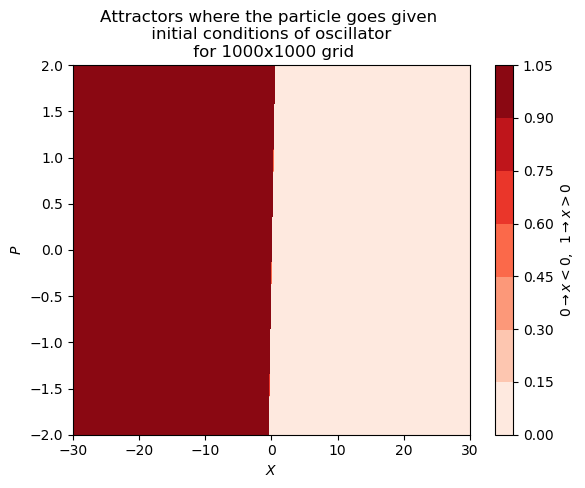

In [42]:
contourf(XX1,PP1,colors,cmap="Reds")
colorbar(label=L"$0\rightarrow x<0$,  $1\rightarrow x>0$")
xlabel(L"$X$")
ylabel(L"$P$")
title("Attractors where the particle goes given \n initial conditions of oscillator \n for 1000x1000 grid")
savefig("particle_sides.png",bbox_inches="tight")
savefig("particle_sides.pdf",bbox_inches="tight")
#matshow(colors)
#xticks(range(-30,stop=(30),length=(10)))
#yticks(range(-2,stop=(2),length=(10)))
#colorbar()

In [162]:
r=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
r=reshape(r,(4,4))

4×4 Array{Int64,2}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

In [109]:
rotl90(r)

4×4 Array{Int64,2}:
 13  14  15  16
  9  10  11  12
  5   6   7   8
  1   2   3   4